In [83]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [84]:
from sklearn.datasets import load_diabetes

In [85]:
X , y = load_diabetes(return_X_y = True)

In [86]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2)

In [87]:
from sklearn.linear_model import Ridge

In [88]:
model1 = Ridge(alpha = 0.1) 

In [89]:
model1.fit(X_train , y_train)

Ridge(alpha=0.1)

In [90]:
model1.coef_

array([ -31.6057256 , -184.77267644,  445.93815779,  318.79774083,
        -28.89954816, -115.59046117, -178.14022772,  111.02803982,
        443.74211876,  107.67565627])

In [91]:
model1.intercept_

150.71000444202298

In [92]:
class MultipleRidge:
    def __init__(self , alpha):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self , X , y):
        X = np.insert(X , 0 , 1, axis = 1)
        # here I add one 1 to X to shape os increased so here now I is created with m+1 , m+1
        I = np.identity(X.shape[1])
        I[0][0] = 0
        result = np.linalg.inv(np.dot(X.T , X) + self.alpha*I).dot(X.T).dot(y)
        self.intercept_ = result[0]
        self.coef_ = result[1:]
        print(self.coef_)
        print(self.intercept_)
        
    def predict(self , X):
        return np.dot(X , self.coef_) + self.intercept_
        

In [93]:
model2 = MultipleRidge(alpha = 0.1)

In [94]:
model2.fit(X_train, y_train)

[ -31.6057256  -184.77267644  445.93815779  318.79774083  -28.89954816
 -115.59046117 -178.14022772  111.02803982  443.74211876  107.67565627]
150.71000444202298


In [95]:
y_pred1 = model2.predict(X_test)
r2_score(y_test , y_pred1)

0.52575622178916

In [96]:
import matplotlib.pyplot as plt

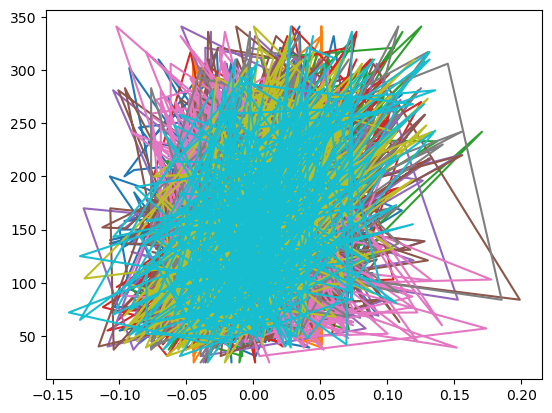

In [97]:
plt.plot(X_train, y_train)   # just for fun do not take it serious

# We can Use gradient Descent to impute Coef and Intercept while minimizing Loss Function

In [98]:
class MultipleRidgeGradientDescent:
    def __init__(self, epochs, learning_rate, alpha):
        self.alpha = alpha
        self.epochs = epochs
        self.lr = learning_rate
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self , X , y):
        self.coef_ = np.ones(X.shape[1])
        self.intercept_ = 0
        thetha = np.insert(self.coef_,0,self.intercept_)
        X = np.insert(X,0,1,axis=1)
        for i in range(self.epochs):
            thetha_derv = np.dot(X.T, X).dot(thetha) - np.dot(X.T , y) + self.alpha * thetha
            thetha = thetha - self.lr * thetha_derv

        self.coef_ = thetha[1:]
        self.intercept_ = thetha[0]
        print(self.coef_)
        print(self.intercept_)

    def predict(self , X):
        return np.dot(X , self.coef_) + self.intercept_
        

In [105]:
model3 = MultipleRidgeGradientDescent(epochs=1000000,alpha=0.001,learning_rate=0.005)  #here epochs is just for fun you can put 500

In [106]:
model3.fit(X_train , y_train)

[ -49.84165202 -218.16598763  483.47087835  348.66135495 -286.40822503
   62.60511965  -80.91842003  123.07813964  597.36196695   89.78019634]
150.61091396817847


In [107]:
y_pred2 = model3.predict(X_test)
r2_score(y_test , y_pred2)

0.5363489210327517